In [19]:
import torch
from pytorch3d.renderer import FoVOrthographicCameras
from pytorch3d.io import load_objs_as_meshes

In [3]:
device = torch.device("cuda")
meshes = load_objs_as_meshes(["data/meshes/mixamo-human.obj"], device=device)

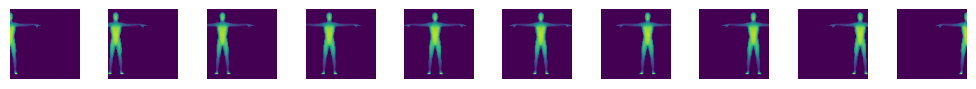

In [20]:
from text3d2video.ipython_utils import display_ims
from text3d2video.rendering import render_depth_map

N = 10
x0 = 1
x1 = -1

line = torch.linspace(x0, x1, N)

r = torch.eye(3)
r[0, 0] = -1
r[2, 2] = -1

R = r.repeat(N, 1, 1)

T = torch.zeros(N, 3)
T[:, 2] = 2
T[:, 0] = line

cameras = FoVOrthographicCameras(device=device, R=R, T=T)
frames = meshes.extend(N)
depth_maps = render_depth_map(frames, cameras, resolution=100)

display_ims(depth_maps)